In [1]:
%matplotlib inline

In [21]:
from kid_readout.measurement import core
from kid_readout.measurement.io import nc

In [3]:
filename = '/data/detectors/2016-06-15_100015_sweep_stream.nc'
ncf = nc.NCFile(filename)

In [4]:
ss = [ncf.read(name) for name in ncf.node_names()]

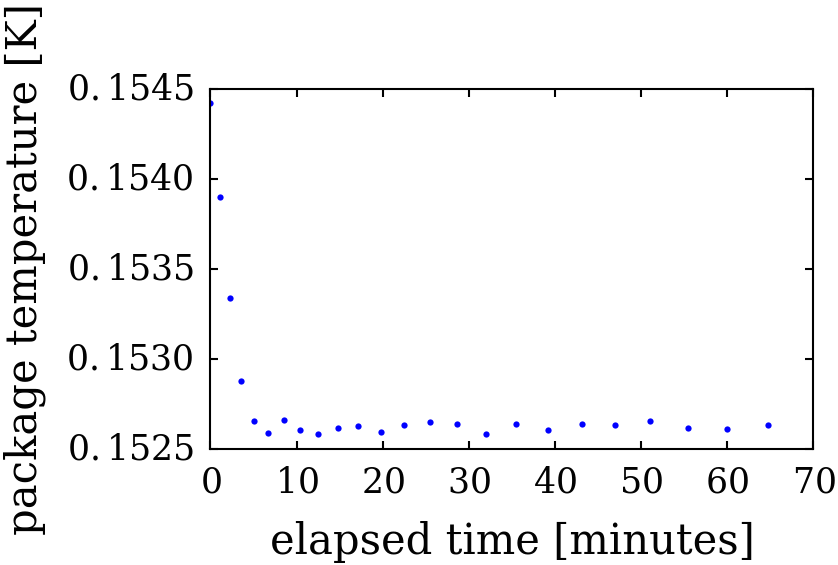

In [5]:
fig, ax = plt.subplots()
ax.plot([(s.stream.epoch - ss[0].stream.epoch) / 60 for s in ss],
        [s.state.temperature.package for s in ss],
        '.b')
ax.set_xlabel('elapsed time [minutes]')
ax.set_ylabel('package temperature [K]');

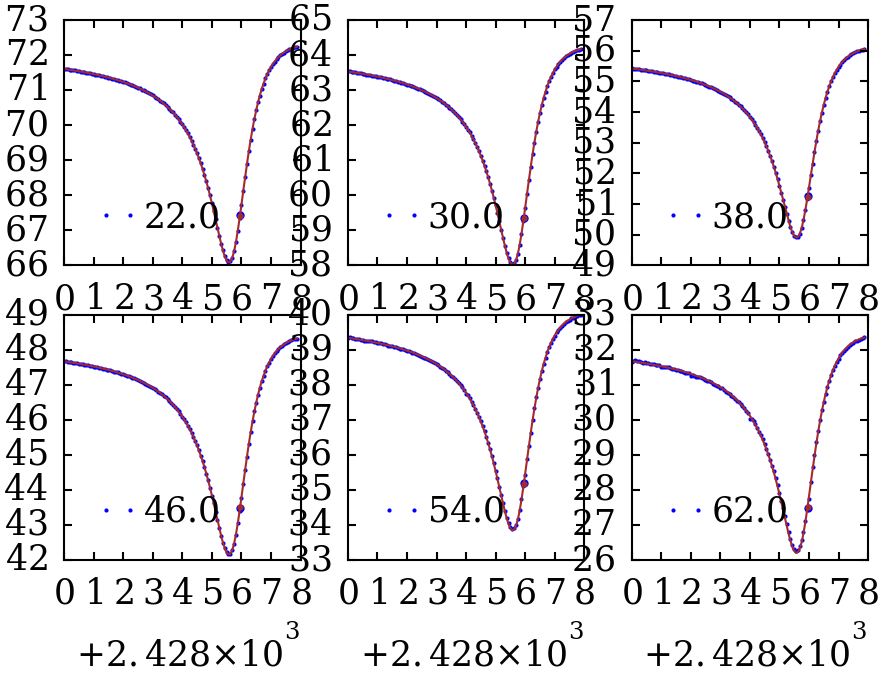

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(4, 3))

for s, ax in zip(ss[0:6], axes.flatten()):
    f_scale = 1e-6
    f_min = s.sweep.frequency.min()
    f_max = s.sweep.frequency.max()

    f_model = np.linspace(f_min, f_max, 1000)
    s21_model = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_model)
    f_r = s.sweep.resonator.f_0
    s21_r = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_r)
    ax.plot(f_scale * s.sweep.frequency, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=2,
            label=str(s.stream.roach_state.dac_attenuation))
    ax.plot(f_scale * s.stream.frequency, 20 * np.log10(np.abs(s.stream.s21_point)), '.b', markersize=4)
    ax.plot(f_scale * f_model, 20 * np.log10(np.abs(s21_model)), '-', color='brown')
    ax.plot(f_scale * f_r, 20 * np.log10(np.abs(s21_r)), '.', color='brown', markersize=3)
    ax.legend(loc='best');

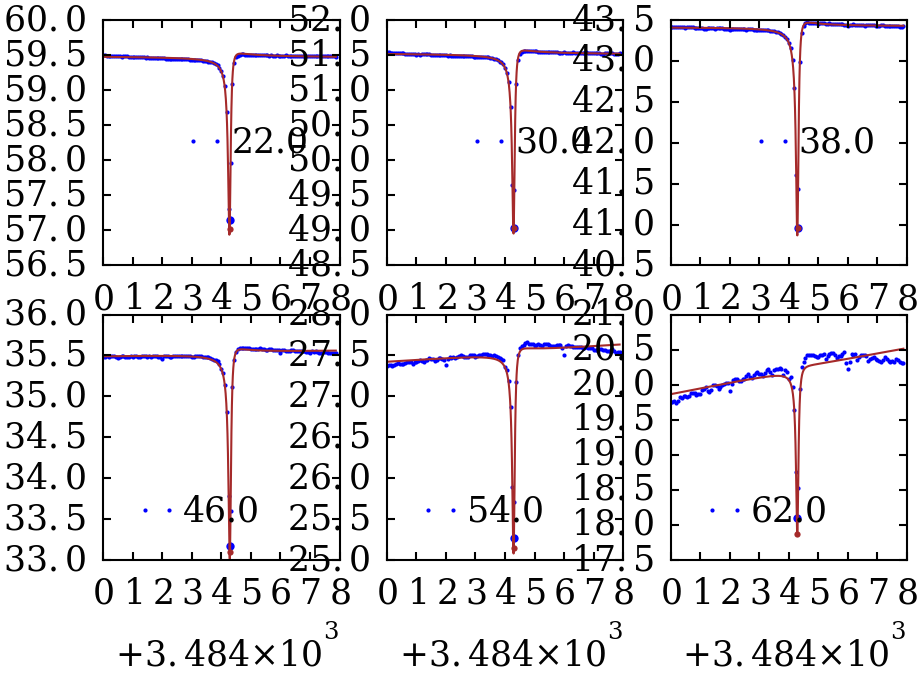

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(4, 3))

for s, ax in zip(ss[6:12], axes.flatten()):
    f_scale = 1e-6
    f_min = s.sweep.frequency.min()
    f_max = s.sweep.frequency.max()

    f_model = np.linspace(f_min, f_max, 1000)
    s21_model = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_model)
    f_r = s.sweep.resonator.f_0
    s21_r = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_r)
    ax.plot(f_scale * s.sweep.frequency, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=2,
            label=str(s.stream.roach_state.dac_attenuation))
    ax.plot(f_scale * s.stream.frequency, 20 * np.log10(np.abs(s.stream.s21_point)), '.b', markersize=4)
    ax.plot(f_scale * f_model, 20 * np.log10(np.abs(s21_model)), '-', color='brown')
    ax.plot(f_scale * f_r, 20 * np.log10(np.abs(s21_r)), '.', color='brown', markersize=3)
    ax.legend(loc='best');

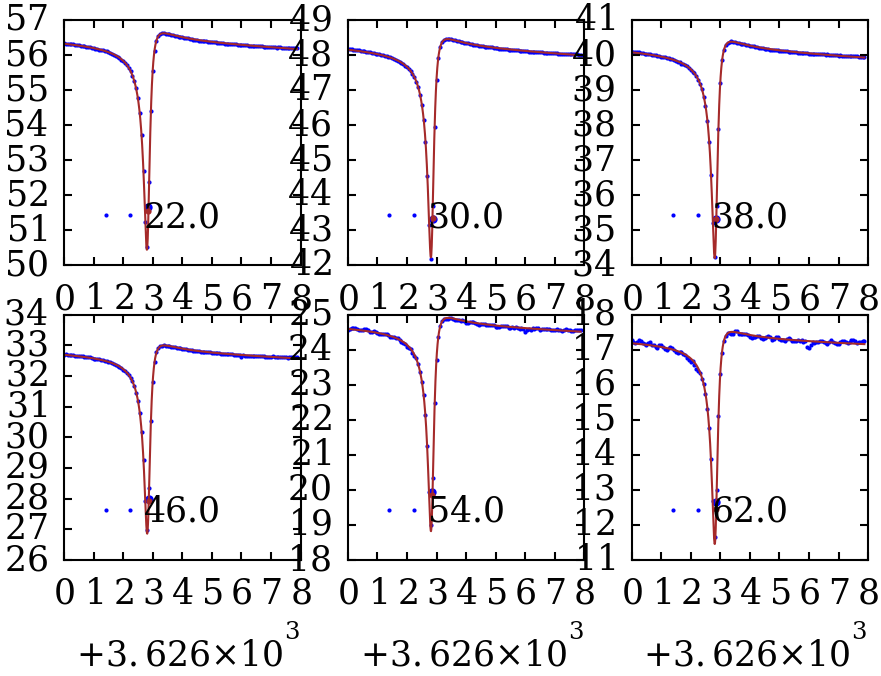

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(4, 3))

for s, ax in zip(ss[12:18], axes.flatten()):
    f_scale = 1e-6
    f_min = s.sweep.frequency.min()
    f_max = s.sweep.frequency.max()

    f_model = np.linspace(f_min, f_max, 1000)
    s21_model = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_model)
    f_r = s.sweep.resonator.f_0
    s21_r = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_r)
    ax.plot(f_scale * s.sweep.frequency, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=2,
            label=str(s.stream.roach_state.dac_attenuation))
    ax.plot(f_scale * s.stream.frequency, 20 * np.log10(np.abs(s.stream.s21_point)), '.b', markersize=4)
    ax.plot(f_scale * f_model, 20 * np.log10(np.abs(s21_model)), '-', color='brown')
    ax.plot(f_scale * f_r, 20 * np.log10(np.abs(s21_r)), '.', color='brown', markersize=3)
    ax.legend(loc='best');

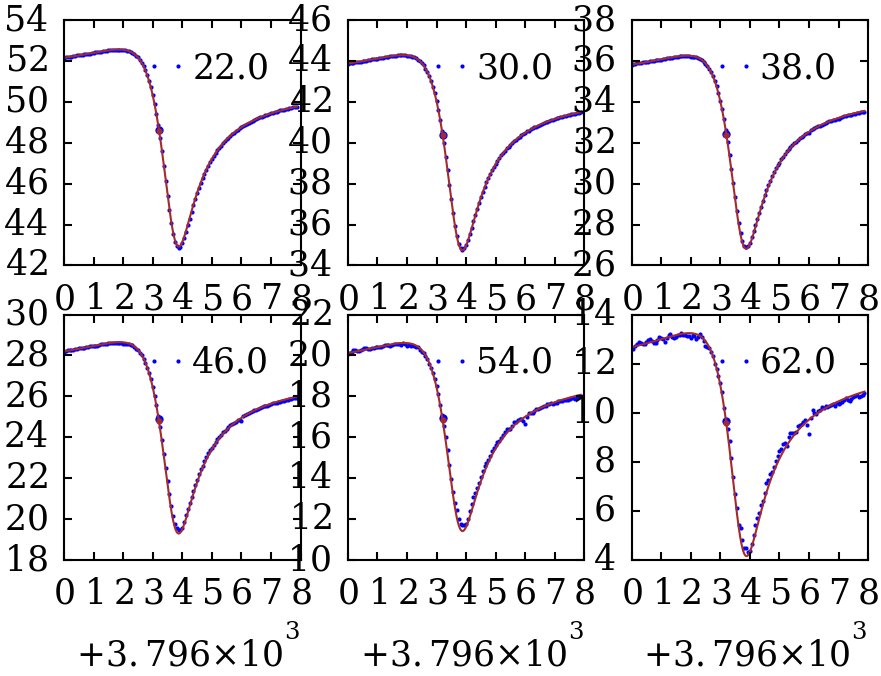

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(4, 3))

for s, ax in zip(ss[18:24], axes.flatten()):
    f_scale = 1e-6
    f_min = s.sweep.frequency.min()
    f_max = s.sweep.frequency.max()

    f_model = np.linspace(f_min, f_max, 1000)
    s21_model = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_model)
    f_r = s.sweep.resonator.f_0
    s21_r = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_r)
    ax.plot(f_scale * s.sweep.frequency, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=2,
            label=str(s.stream.roach_state.dac_attenuation))
    ax.plot(f_scale * s.stream.frequency, 20 * np.log10(np.abs(s.stream.s21_point)), '.b', markersize=4)
    ax.plot(f_scale * f_model, 20 * np.log10(np.abs(s21_model)), '-', color='brown')
    ax.plot(f_scale * f_r, 20 * np.log10(np.abs(s21_r)), '.', color='brown', markersize=3)
    ax.legend(loc='best');

In [10]:
df = pd.concat([s.to_dataframe() for s in ss])

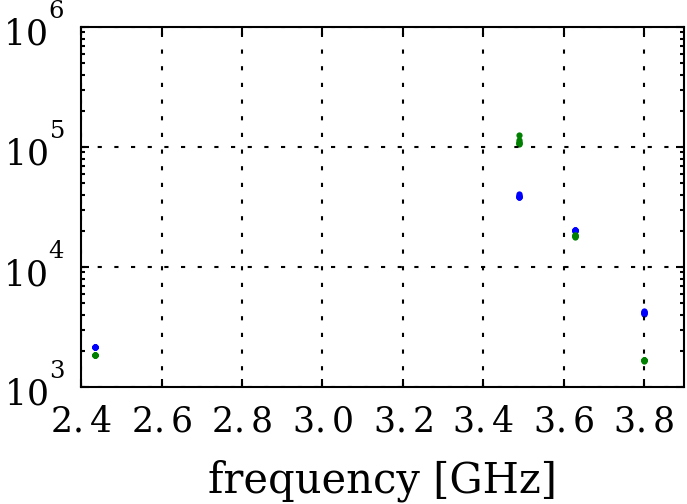

In [11]:
fig, ax = plt.subplots()

ax.plot(1e-9 * df.res_f_0, df.res_Q_i, '.')
ax.plot(1e-9 * df.res_f_0, df.res_Q_e_real, '.')

ax.set_xlim(2.4, 3.9)
ax.set_yscale('log')
ax.set_xlabel('frequency [GHz]')
ax.grid(True);

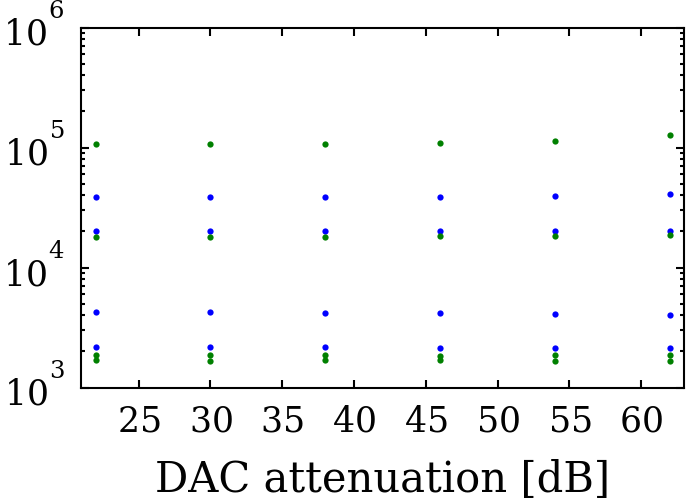

In [12]:
fig, ax = plt.subplots()

ax.plot(df.roach_dac_attenuation, df.res_Q_i, '.')
ax.plot(df.roach_dac_attenuation, df.res_Q_e_real, '.')

ax.set_xlim(21, 63)
ax.set_yscale('log')
ax.set_xlabel('DAC attenuation [dB]');

In [13]:
lo = np.unique(df.roach_lo_frequency)

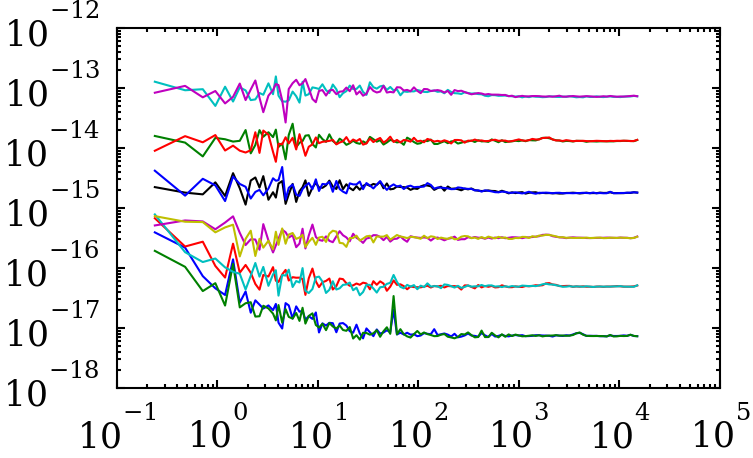

In [14]:
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

for n, row in df[df.roach_lo_frequency==lo[0]].iterrows():
    ax.plot(row.S_frequency, row.S_xx, label=str(row.roach_dac_attenuation))
    ax.plot(row.S_frequency, row.S_yy)


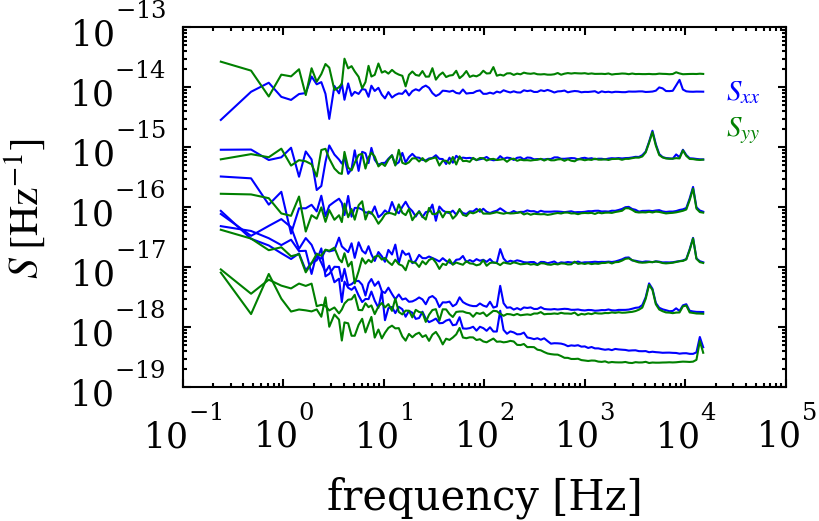

In [84]:
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('$S \; [\mathrm{Hz}^{-1}]$')

for n, row in df[df.roach_lo_frequency==lo[1]].iterrows():
    ax.plot(row.S_frequency, row.S_xx, label=str(row.roach_dac_attenuation), color='blue')
    ax.plot(row.S_frequency, row.S_yy, color='green')

ax.text(0.9, 0.8, '$S_{xx}$', transform=ax.transAxes, fontsize='xx-small', color='blue')
ax.text(0.9, 0.7, '$S_{yy}$', transform=ax.transAxes, fontsize='xx-small', color='green')
fig.savefig('/home/flanigan/temp/best_S_vs_readout_power.pdf', bbox_inches='tight')

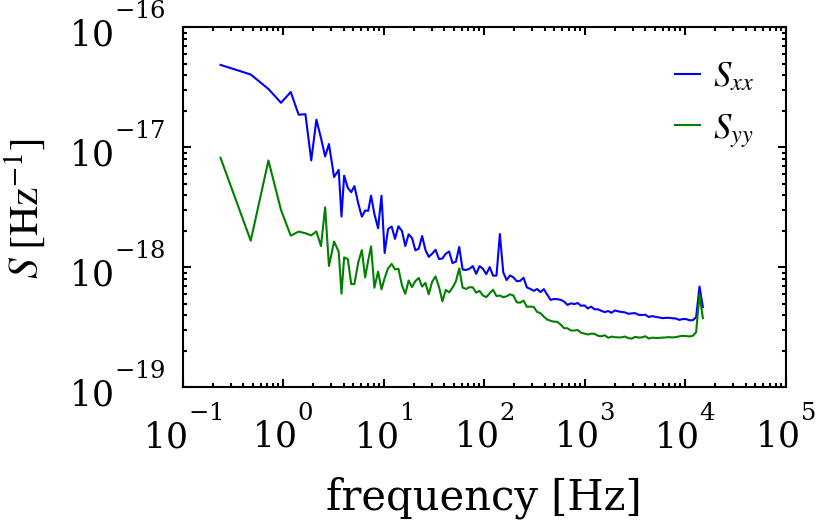

In [89]:
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('$S \; [\mathrm{Hz}^{-1}]$')

row = df.iloc[6]
ax.plot(row.S_frequency, row.S_xx, label='$S_{xx}$', color='blue')
ax.plot(row.S_frequency, row.S_yy, label='$S_{yy}$', color='green')
ax.legend(loc='best')

fig.savefig('/home/flanigan/temp/best_S_highest_readout_power.pdf', bbox_inches='tight')

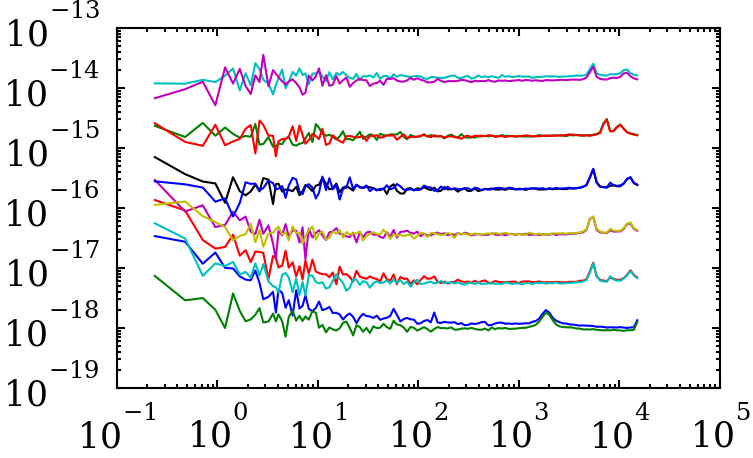

In [16]:
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

for n, row in df[df.roach_lo_frequency==lo[2]].iterrows():
    ax.plot(row.S_frequency, row.S_xx, label=str(row.roach_dac_attenuation))
    ax.plot(row.S_frequency, row.S_yy)

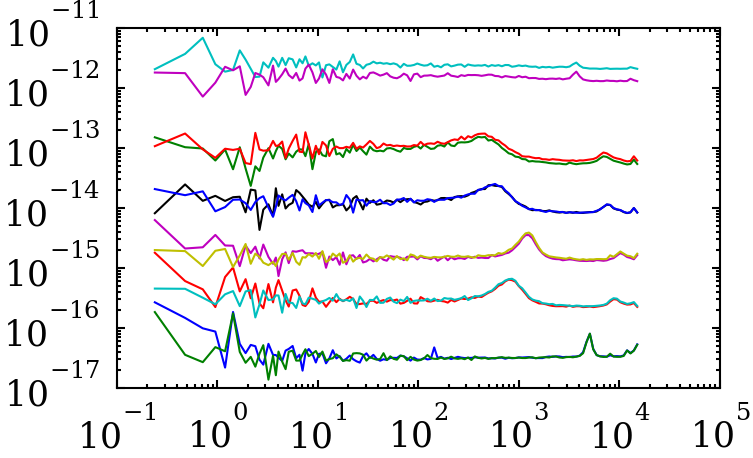

In [17]:
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

for n, row in df[df.roach_lo_frequency==lo[3]].iterrows():
    ax.plot(row.S_frequency, row.S_xx, label=str(row.roach_dac_attenuation))
    ax.plot(row.S_frequency, row.S_yy)

In [19]:
df.iloc[6:12].res_Q_i

0    38403.707628
0    38772.701306
0    38674.603524
0    38667.845506
0    39071.565632
0    40696.842577
Name: res_Q_i, dtype: float64

In [22]:
best = core.from_series(df.iloc[6])

In [69]:
best.set_q_and_x(deglitch=False)
best.set_S(binned=False)

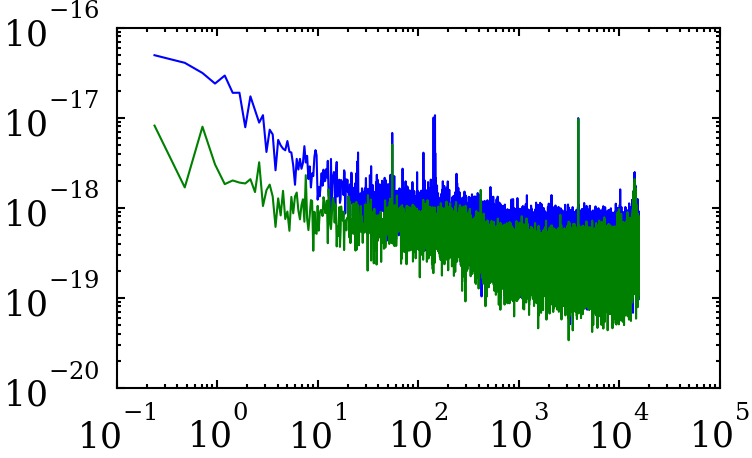

In [70]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(best.S_frequency, best.S_xx)
ax.plot(best.S_frequency, best.S_yy)

#ax.set_xlim(50, 200)

In [60]:
glitch = best.epochs(best.stream.epoch + 8.5575, best.stream.epoch + 8.5585)
glitch.set_q_and_x(deglitch=False)

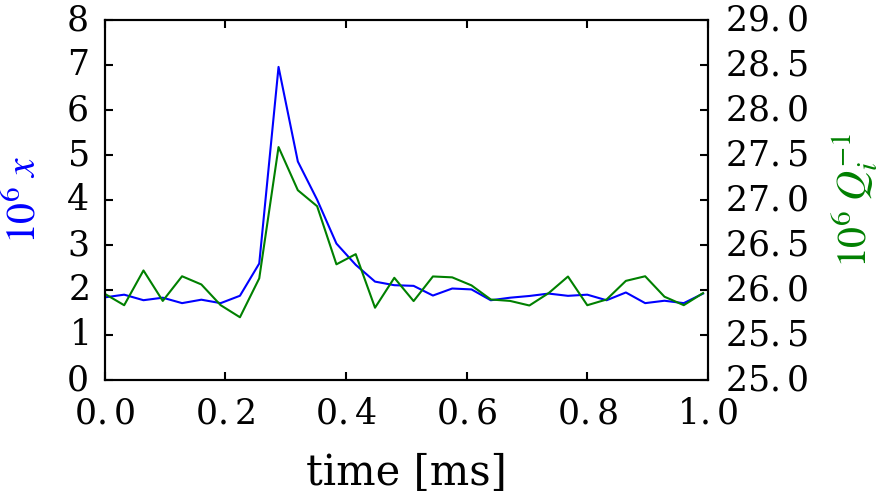

In [77]:
x_color = 'blue'
q_color = 'green'

fig, x_ax = plt.subplots()
q_ax = x_ax.twinx()
x_ax.set_xlabel('time [ms]')
x_ax.set_ylabel('$10^6 \; x$', color=x_color)
q_ax.set_ylabel('$10^6 \; Q_i^{-1}$', color=q_color)

x_ax.plot(1e3 * glitch.stream.sample_time, 1e6 * glitch.x, color=x_color)
q_ax.plot(1e3 * glitch.stream.sample_time, 1e6 * glitch.q, color=q_color)

x_ax.set_ylim(0, 8)
q_ax.set_ylim(25, 29)
fig.savefig('/home/flanigan/temp/glitch_x_and_q_vs_time.pdf', bbox_inches='tight')